# Applied Data Science Capstone
## Battle of Neighborhoods
### Where there is will, there is food!

First Step: Import all modules necessary for Data collection and analysis

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


Initialize variables with Foursquare credentials

In [10]:
CLIENT_ID = '0Y2PUBKR5RZIQGVTGOMBNMQXH0KLXRTGUML2NE0KP4TSI5MT' # your Foursquare ID
CLIENT_SECRET = 'XLN4MDJ3YWMJFSJMXYHJDTOZKCQTXBTGECK4A1IAFSK2JCEH' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0Y2PUBKR5RZIQGVTGOMBNMQXH0KLXRTGUML2NE0KP4TSI5MT
CLIENT_SECRET:XLN4MDJ3YWMJFSJMXYHJDTOZKCQTXBTGECK4A1IAFSK2JCEH


Import the dataset containing neighborhoods of Delhi with Geolocation data

In [11]:
neighborhoods=pd.read_csv('delhi_dataSet.csv')
neighborhoods=neighborhoods[pd.notnull(neighborhoods['latitude'])]
neighborhoods=neighborhoods[pd.notnull(neighborhoods['longitude'])]
neighborhoods.head(10)

,Borough,Neighborhood,latitude,longitude
0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
3,North West Delhi,Bawana,28.799660,77.032885
5,North West Delhi,Dhaka,39.031714,-90.261223
6,North West Delhi,Jahangirpuri,28.725972,77.162658
7,North West Delhi,Karala,28.735140,77.032511
8,North West Delhi,Keshav Puram,28.688926,77.161683
9,North West Delhi,Kingsway Camp,28.614262,77.201555
10,North West Delhi,Kohat Enclave,28.698041,77.140539


In [12]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 9 boroughs and 163 neighborhoods.


In [43]:
delhi_address = 'New Delhi, India'

geolocator = Nominatim(timeout=3, user_agent="foursquare_agent")
delhi_location = geolocator.geocode(address)
delhi_latitude = delhi_location.latitude
delhi_longitude = delhi_location.longitude
print('The geograpical coordinate of New Delhi are {}, {}.'.format(delhi_latitude, delhi_longitude))

The geograpical coordinate of New Delhi are 28.6141793, 77.2022662.


Now we import available restaurant data as per locations in Delhi to get a rough idea as to which places have a higher density of food joints.

In [24]:
restaurants=pd.read_csv('restaurant_dataSet.csv')
restaurants=restaurants[pd.notnull(restaurants['Venue Longitude'])]
restaurants=restaurants[pd.notnull(restaurants['Venue Latitude'])]
restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.614192,77.071541,Eagle Boys Pizza,28.615595,77.070784,Pizza Place
1,Adarsh Nagar,28.614192,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,Adarsh Nagar,28.614192,77.071541,Bikano East Patel Nagar,28.616190,77.066978,Fast Food Restaurant
3,Adarsh Nagar,28.614192,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant
...,...,...,...,...,...,...,...
844,Tilak Nagar,28.639650,77.094039,CCD tilak nagar,28.636264,77.097048,Café
845,Vikaspuri,28.638419,77.070836,Domino's Pizza,28.638000,77.075000,Pizza Place
846,Vikaspuri,28.638419,77.070836,McDonald's,28.639752,77.075190,Fast Food Restaurant
847,Vikaspuri,28.638419,77.070836,Asian Garden,28.639661,77.074482,Indian Restaurant


In [25]:
print('The dataframe has {} restaurants in {} neighbourhoods'.format(
        restaurants['Venue'].shape[0],
        len(restaurants['Neighborhood'].unique())
    )
)

The dataframe has 849 restaurants in 116 neighbourhoods


In [26]:
map_rest = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood, venue in zip(restaurants['Venue Latitude'], restaurants['Venue Longitude'], restaurants['Neighborhood'], restaurants['Venue']):
    label = '{}, {}'.format(venue,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_rest)  
    
map_rest

On analyzing this plot of over 800 restaurants in Delhi, we see there is higher concentration in certain regions as compared to others.

We select top 5 localities that seem to have a dense number of Restaurants. (This is a preliminary analysis as the dataset we obtained is not real time)

In [100]:
address1 = 'Connaught Place, Delhi, India'

geolocator = Nominatim(timeout=3, user_agent="foursquare_agent")
location1 = geolocator.geocode(address1)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Connaught Place are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Connaught Place are 28.6141793, 77.2022662.


In [101]:
address2 = 'Green Park, Delhi, India'

location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of Green Park, Delhi are {}, {}.'.format(latitude2, longitude2))

The geograpical coordinate of Green Park, Delhi are 28.5555374, 77.2024966.


In [102]:
address3 = 'Nehru Place, Delhi, India'

location3 = geolocator.geocode(address3)
latitude3 = location3.latitude
longitude3 = location3.longitude
print('The geograpical coordinate of Nehru Place, Delhi are {}, {}.'.format(latitude3, longitude3))

The geograpical coordinate of Nehru Place, Delhi are 28.54925735, 77.25295199508821.


In [103]:
address4 = 'Shivaji Place,Delhi, India'

location4 = geolocator.geocode(address4)
latitude4 = location4.latitude
longitude4 = location4.longitude
print('The geograpical coordinate of Shivaji Place, Delhi are {}, {}.'.format(latitude4, longitude4))

The geograpical coordinate of Shivaji Place, Delhi are 28.651657, 77.1217027.


In [122]:
address5 = 'Kamla Nagar, Delhi, India'

location5 = geolocator.geocode(address5)
latitude5 = location5.latitude
longitude5 = location5.longitude
print('The geograpical coordinate of Kamla Nagar, Delhi are {}, {}.'.format(latitude5, longitude5))

The geograpical coordinate of Kamla Nagar, Delhi are 28.680344249999997, 77.20212920033055.


In [123]:
lst=[[address1,latitude1, longitude1],
    [address2,latitude2, longitude2],
    [address3,latitude3, longitude3],
    [address4,latitude4, longitude4],
    [address5,latitude5, longitude5]]
cols=cols = ['Area', 'Latitude', 'Longitude']
top5_delhi = pd.DataFrame(lst, columns=cols)
top5_delhi

,Area,Latitude,Longitude
0,"Connaught Place, Delhi, India",28.614179,77.202266
1,"Green Park, Delhi, India",28.555537,77.202497
2,"Nehru Place, Delhi, India",28.549257,77.252952
3,"Shivaji Place,Delhi, India",28.651657,77.121703
4,"Kamla Nagar, Delhi, India",28.680344,77.202129


These are the 5 distinct localities that form the most dense restaurant clusters

In [125]:
Delhi_5Wards = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(top5_delhi['Latitude'], top5_delhi['Longitude'], 
                           top5_delhi['Area']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Delhi_5Wards) 
    
Delhi_5Wards

In [126]:
radius = 5000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

In [127]:
Delhi_5_Dist_Venues = getNearbyVenues(names=top5_delhi['Area'],
                                   latitudes=top5_delhi['Latitude'],
                                   longitudes=top5_delhi['Longitude']
                                  )

Connaught Place, Delhi, India
Green Park, Delhi, India
Nehru Place, Delhi, India
Shivaji Place,Delhi, India
Kamla Nagar, Delhi, India


We now fetch the venues within 5km range of these centres and subsequently filter the restaurants from the results returned by foursquare API

In [128]:
print ("Shape of the Venues Dataframe: ", Delhi_5_Dist_Venues.shape)
Delhi_5_Dist_Venues.tail(3)

Shape of the Venues Dataframe:  (494, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
491,"Kamla Nagar, Delhi, India",28.680344,77.202129,Glenze Cafe & Bakers,28.647162,77.188480,Café
492,"Kamla Nagar, Delhi, India",28.680344,77.202129,Alfa Spice,28.644484,77.178748,Multicuisine Indian Restaurant
493,"Kamla Nagar, Delhi, India",28.680344,77.202129,Dukes Pastry Shop,28.641820,77.186111,Bakery


In [129]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Delhi_5_Dist_Venues_only_restaurant = Delhi_5_Dist_Venues[Delhi_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Delhi_5_Dist_Venues_only_restaurant.index = np.arange(1, len(Delhi_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Delhi_5_Dist_Venues_only_restaurant.shape)
Delhi_5_Dist_Venues_only_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (179, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,"Connaught Place, Delhi, India",28.614179,77.202266,Tamra,28.620543,77.218174,Restaurant
2,"Connaught Place, Delhi, India",28.614179,77.202266,Varq | वर्क,28.604547,77.223781,Indian Restaurant
3,"Connaught Place, Delhi, India",28.614179,77.202266,Sanadige,28.601969,77.187020,Karnataka Restaurant


Now we plot all the 179 restaurants in a map to see the distinct clusters

In [131]:
map_restaurants = folium.Map(location=[delhi_latitude, delhi_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Connaught Place, Delhi, India', 'Green Park, Delhi, India', 'Nehru Place, Delhi, India', 'Shivaji Place,Delhi, India', 'Kamla Nagar, Delhi, India']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Delhi_5_Dist_Venues_only_restaurant['Venue_Lat'], 
                                  Delhi_5_Dist_Venues_only_restaurant['Venue_Long'], 
                                  Delhi_5_Dist_Venues_only_restaurant['Venue_Category'], 
                                  Delhi_5_Dist_Venues_only_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

We also see the distinct categories of restaurants as it will be benificial in recommending which type of restaurants would be popular in which area

In [132]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Delhi_5_Dist_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Delhi_5_Dist_Venues[['Venue_Category']][70:75])

There are 102 unique categories.
              Venue_Category
70        Chinese Restaurant
71  Mediterranean Restaurant
72                     Hotel
73                Restaurant
74         Indian Restaurant


In [133]:
print (Delhi_5_Dist_Venues['Venue_Category'].value_counts())

Indian Restaurant       56
Café                    33
Coffee Shop             27
Fast Food Restaurant    26
Hotel                   23
                        ..
Sports Bar               1
Speakeasy                1
Grocery Store            1
Electronics Store        1
Food                     1
Name: Venue_Category, Length: 102, dtype: int64


In [134]:
# create a dataframe of top 10 categories
Delhi_5_Dist_Venues_Top10 = Delhi_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Delhi_5_Dist_Venues_Top10=Delhi_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Delhi_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Delhi_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Indian Restaurant,56
1,Café,33
2,Coffee Shop,27
3,Fast Food Restaurant,26
4,Hotel,23
5,Pizza Place,18
6,Restaurant,15
7,Italian Restaurant,14
8,Lounge,13
9,Bakery,12


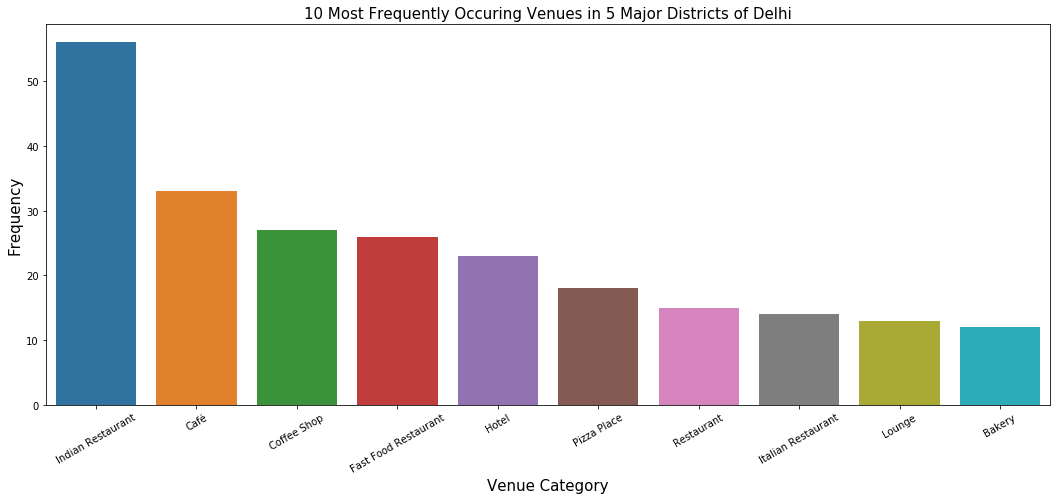

In [135]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Delhi_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Delhi', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [136]:
Delhi_5_Dist_Venues_onehot = pd.get_dummies(Delhi_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Delhi_5_Dist_Venues_onehot['District'] = Delhi_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Delhi_5_Dist_Venues_onehot.columns[-1]] + list(Delhi_5_Dist_Venues_onehot.columns[:-1])
Delhi_5_Dist_Venues_onehot = Delhi_5_Dist_Venues_onehot[fixed_columns]
Delhi_5_Dist_Venues_onehot.head(3)

,District,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Sports Bar,Stadium,Tea Room,Temple,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant
0,"Connaught Place, Delhi, India",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Connaught Place, Delhi, India",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Connaught Place, Delhi, India",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
Delhi_5_Dist_Venues_Grouped = Delhi_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Delhi_5_Dist_Venues_Grouped.index = np.arange(1, len(Delhi_5_Dist_Venues_Grouped)+1)
Delhi_5_Dist_Venues_Grouped

,District,American Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Sports Bar,Stadium,Tea Room,Temple,Thai Restaurant,Theater,Tibetan Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant
1,"Connaught Place, Delhi, India",0.000000,0.010000,0.02,0.01,0.02,0.00,0.020000,0.010000,0.030000,...,0.000000,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.000000,0.000000
2,"Green Park, Delhi, India",0.020000,0.000000,0.02,0.00,0.04,0.00,0.000000,0.040000,0.020000,...,0.000000,0.02,0.02,0.00,0.02,0.00,0.01,0.00,0.000000,0.000000
3,"Kamla Nagar, Delhi, India",0.000000,0.010000,0.00,0.00,0.01,0.01,0.010000,0.040000,0.010000,...,0.000000,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.000000,0.000000
4,"Nehru Place, Delhi, India",0.010000,0.000000,0.00,0.00,0.01,0.00,0.000000,0.020000,0.020000,...,0.000000,0.02,0.01,0.01,0.02,0.00,0.01,0.01,0.000000,0.000000
5,"Shivaji Place,Delhi, India",0.010638,0.010638,0.00,0.00,0.00,0.00,0.031915,0.010638,0.010638,...,0.010638,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.010638,0.010638


After plotting multiple graphs and taking a count of different categories we can tabulate the frequencies according to category and area which gives us a fair idea as to what is popular in which area

In [140]:
num_top_venues = 10

for places in Delhi_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%% "+places+" %%%%%%%%")
    temp = Delhi_5_Dist_Venues_Grouped[Delhi_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%% Connaught Place, Delhi, India %%%%%%%%
                      Venue  Freq
0         Indian Restaurant  0.14
1                      Café  0.11
2                     Hotel  0.09
3                    Lounge  0.04
4        Chinese Restaurant  0.03
5                       Bar  0.03
6   South Indian Restaurant  0.02
7                Restaurant  0.02
8             Deli / Bodega  0.02
9  Mediterranean Restaurant  0.02


%%%%%%%%% Green Park, Delhi, India %%%%%%%%
                Venue  Freq
0   Indian Restaurant  0.10
1  Italian Restaurant  0.06
2              Lounge  0.05
3         Coffee Shop  0.05
4    Asian Restaurant  0.04
5              Bakery  0.04
6                Café  0.04
7       Shopping Mall  0.03
8              Market  0.03
9        Dessert Shop  0.03


%%%%%%%%% Kamla Nagar, Delhi, India %%%%%%%%
                  Venue  Freq
0  Fast Food Restaurant  0.12
1           Pizza Place  0.10
2     Indian Restaurant  0.10
3           Coffee Shop  0.09
4           Snack Place  0

In [145]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Delhi_5_Dist_Venues_Grouped['District']

for ind in np.arange(Delhi_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Delhi_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Connaught Place, Delhi, India",Indian Restaurant,Café,Hotel,Lounge,Chinese Restaurant,Bar,Restaurant,History Museum,Italian Restaurant,Deli / Bodega
2,"Green Park, Delhi, India",Indian Restaurant,Italian Restaurant,Coffee Shop,Lounge,Asian Restaurant,Bakery,Café,Shopping Mall,Market,Dessert Shop
3,"Kamla Nagar, Delhi, India",Fast Food Restaurant,Indian Restaurant,Pizza Place,Coffee Shop,Café,Snack Place,Hotel,Donut Shop,Bakery,Chinese Restaurant
4,"Nehru Place, Delhi, India",Indian Restaurant,Restaurant,Market,Café,Italian Restaurant,Hotel,Dessert Shop,Coffee Shop,Lounge,Japanese Restaurant
5,"Shivaji Place,Delhi, India",Fast Food Restaurant,Indian Restaurant,Pizza Place,Coffee Shop,Café,Donut Shop,Sandwich Place,Hotel,Restaurant,Shopping Mall
